In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [8]:
house_prices = pd.read_csv('house_prices.csv')
house_prices['Land area']=house_prices['Land area'].str.extract('(\d+)').astype(float)
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000


Request consensus population API

In [10]:
def get_census_population(x, y):
    url = "https://koordinates.com/services/query/v1/vector.json"
    params = {
        "key": "93e07a3207454a74a4d662b03ea1aebe",
        "layer": "104612",
        "y":str(y),
        "x":str(x)
    }

    response = requests.get(url, params=params)
    if response.status_code != 200:
        return "error"
    print(pd.Series({'C18_CURPop': response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']}))
    return pd.Series({'C18_CURPop': response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']})
    
house_prices[['C18_CURPop']] = house_prices[['Longitude', 'Latitude']].apply(lambda x: get_census_population(*x), axis=1)
# house_prices[['C18_CURPop']] = house_prices.apply(lambda x: get_census_population(house_prices.Latitude, house_prices.Longitude), axis=1)

Save backup csv

In [ ]:
house_prices.to_csv('C18_CURPop.csv', index=False)

In [11]:
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000


Read Deprivation Indexes and join with House Prices

In [40]:
!curl https://www.otago.ac.nz/wellington/otago730395.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1178k  100 1178k    0     0   356k      0  0:00:03  0:00:03 --:--:--  356k


In [41]:
house_prices = pd.read_csv('C18_CURPop.csv')
deprivation_indexes = pd.read_excel('otago730395.xlsx')
house_prices = pd.merge(house_prices, deprivation_indexes[['SA12018_code', 'NZDep2018']], left_on='SA1', right_on='SA12018_code')
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,SA12018_code,NZDep2018
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,7.006319e+06,5.063749
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.591262e+03,2.913471
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.001130e+06,1.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,7.004416e+06,2.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,7.006325e+06,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,7.008384e+06,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,7.011028e+06,10.000000


Drop SA12018_code due to repeat

In [42]:
house_prices=house_prices.drop(columns=['SA12018_code'])
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,NZDep2018
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


Save backup csv

In [43]:
house_prices.to_csv('full_dataset.csv', index=False)


# Analysis

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

house_prices = pd.read_csv('full_dataset.csv')
house_prices.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area      float64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
C18_CURPop       int64
NZDep2018      float64
dtype: object

In [75]:
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,NZDep2018
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


In [76]:
house_prices.isnull().values.any()

True

In [77]:
house_prices.shape

(1051, 17)

In [78]:
house_prices[house_prices.isna().any(axis=1)]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214.0,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245.0,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0


There are 3 rows with NA values - 2 with no bathroom values and 1 with no Suburb value. Since suburb is a string and will not be used in the model predictions, we will leave it in the dataset and remove the two rows that contain NA values in the bathroom column. 

In [79]:
house_prices = house_prices[house_prices["Bathrooms"].notna()]
house_prices[house_prices.isna().any(axis=1)]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0


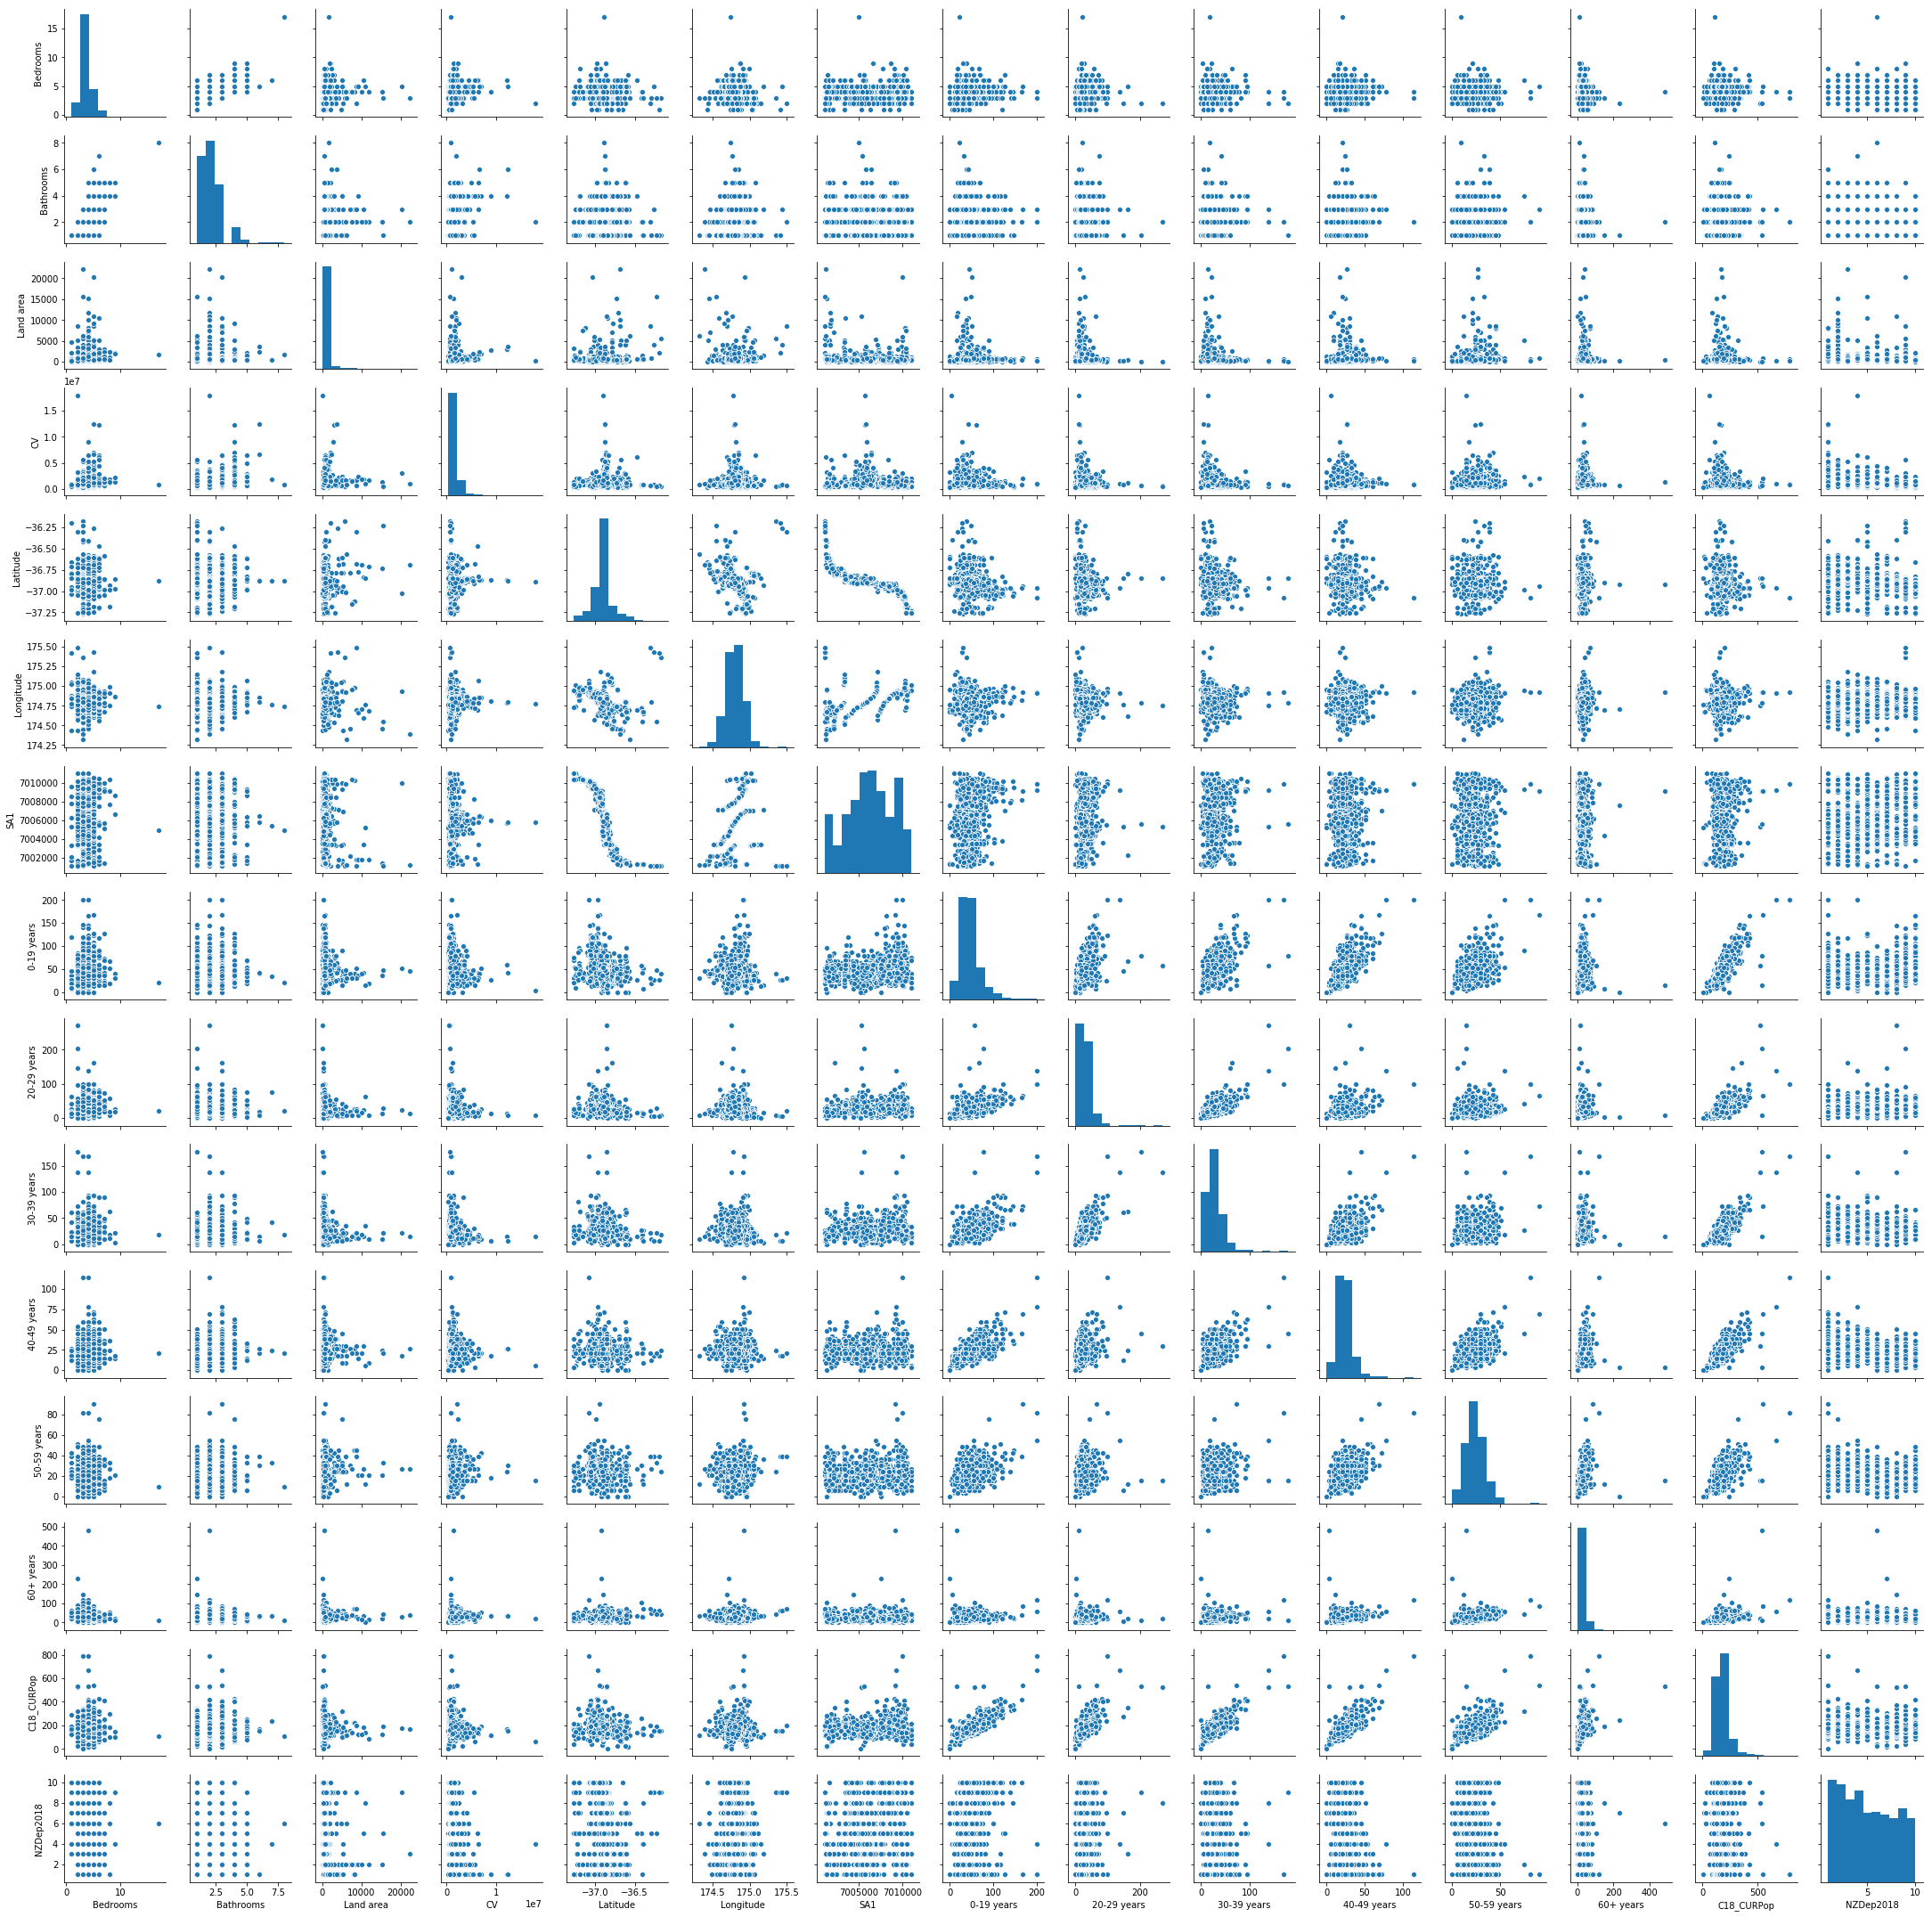

In [80]:
sns.pairplot(house_prices, height = 2.0)

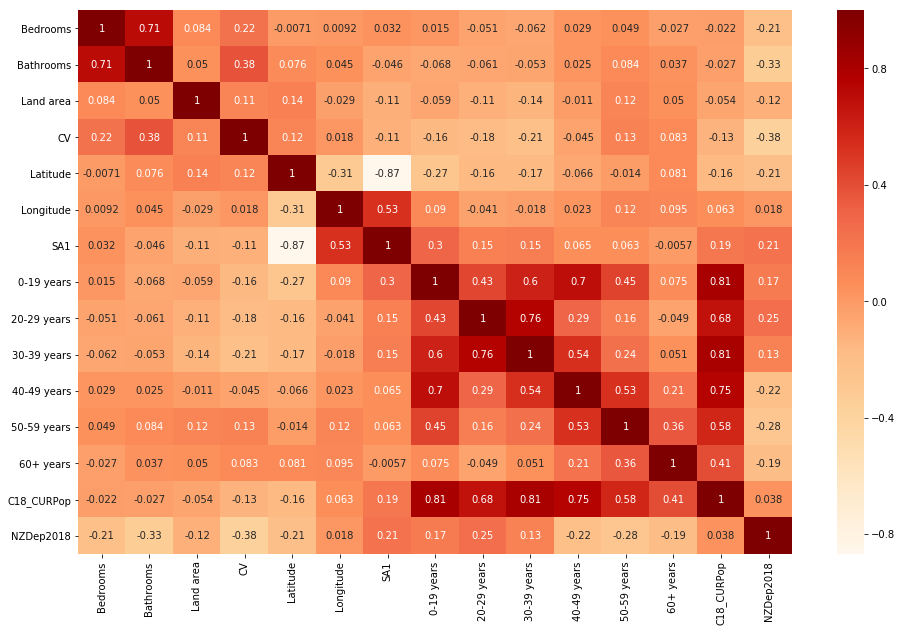

In [81]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = house_prices.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

From the correlation map we can see that there is a strong positive relationship between the number of bedrooms and the number of bathrooms in a house, as well as a moderate to strong relationship between each of the x-y years values and C18CURPop. 

There is a moderate negative relationship between CV and NZDep2018

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

0.16121447898185115
1496258333235.7148


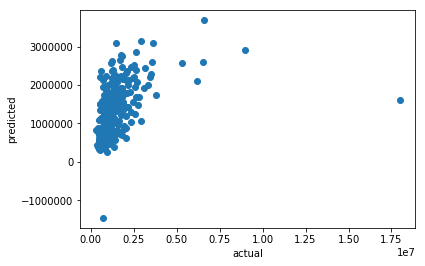

In [83]:
x = house_prices.drop(['CV', 'Address', 'Suburbs'], axis=1)
y = house_prices['CV']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(train_x, train_y)
predicted = model.predict(test_x)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(test_y, predicted)

print(model.score(test_x, test_y))


print(mean_squared_error(test_y, predicted))
# The coefficient of determination: 1 is perfect prediction


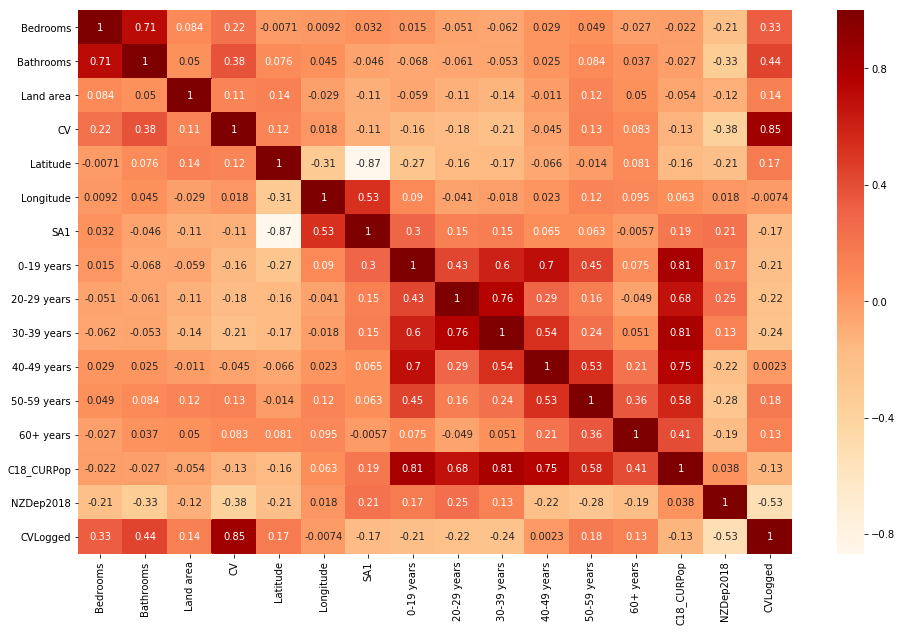

In [84]:
house_prices['CVLogged'] = np.log(house_prices['CV'])
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = house_prices.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

0.38212985231400176
0.18754476400573014


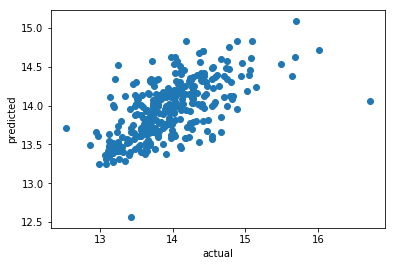

In [85]:
x = house_prices.drop(['CV', 'Address', 'Suburbs', 'CVLogged'], axis=1)
y = house_prices['CVLogged']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(train_x, train_y)
predicted = model.predict(test_x)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(test_y, predicted)

print(model.score(test_x, test_y))


print(mean_squared_error(test_y, predicted))

In [86]:
house_prices_encoded = house_prices[house_prices.notna()]
house_prices_encoded = pd.get_dummies(house_prices, columns=["Suburbs"])

0.18156971364954366
0.24842163921268343


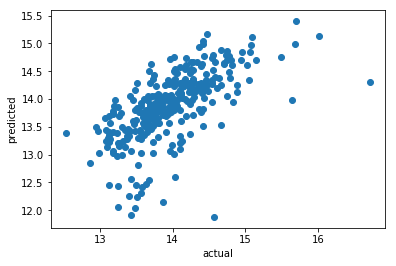

In [87]:
x = house_prices_encoded.drop(['CV', 'Address', 'CVLogged'], axis=1)
y = house_prices_encoded['CVLogged']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(train_x, train_y)
predicted = model.predict(test_x)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(test_y, predicted)
print(model.score(test_x, test_y))
print(mean_squared_error(test_y, predicted))

In [91]:
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,NZDep2018,CVLogged
count,1049.000000,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,3.776930,2.073403,858.185891,1.387926e+06,-36.893897,174.799615,7.006327e+06,47.525262,28.893232,26.979981,24.125834,22.612965,29.382269,179.776930,5.069590,13.954854
std,1.170487,0.992985,1589.433957,1.184027e+06,0.130158,0.119468,2.587674e+03,24.709758,20.995139,17.934747,10.953205,10.220137,21.820173,71.057174,2.913171,0.567022
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,12.506177
25%,3.000000,1.000000,323.000000,7.800000e+05,-36.950722,174.722474,7.004424e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000,13.567049
50%,4.000000,2.000000,572.000000,1.080000e+06,-36.893368,174.798648,7.006333e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000,13.892472
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.856192,174.880945,7.008385e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,207.000000,8.000000,14.285514
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000,16.705882


0.37055039053857647
0.19105952747847388


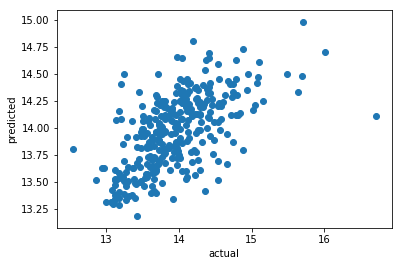

In [100]:
x = house_prices[['Bedrooms', 'Bathrooms', 'NZDep2018', 'Land area', 'SA1', 'C18_CURPop']]
y = house_prices['CVLogged']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(train_x, train_y)
predicted = model.predict(test_x)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(test_y, predicted)

print(model.score(test_x, test_y))
print(mean_squared_error(test_y, predicted))